In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

%matplotlib inline
%config InlineBackend.figure_format = 'png'
pd.set_option("max_columns",50)
sns.set_style('whitegrid')

In [39]:
df = pd.read_csv('../data/train_2013.csv', nrows=10000, index_col=0)
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6214 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9983 non-null object
srch_co                      9983 non-null object
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id     10000 non-n

In [40]:
df = df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)

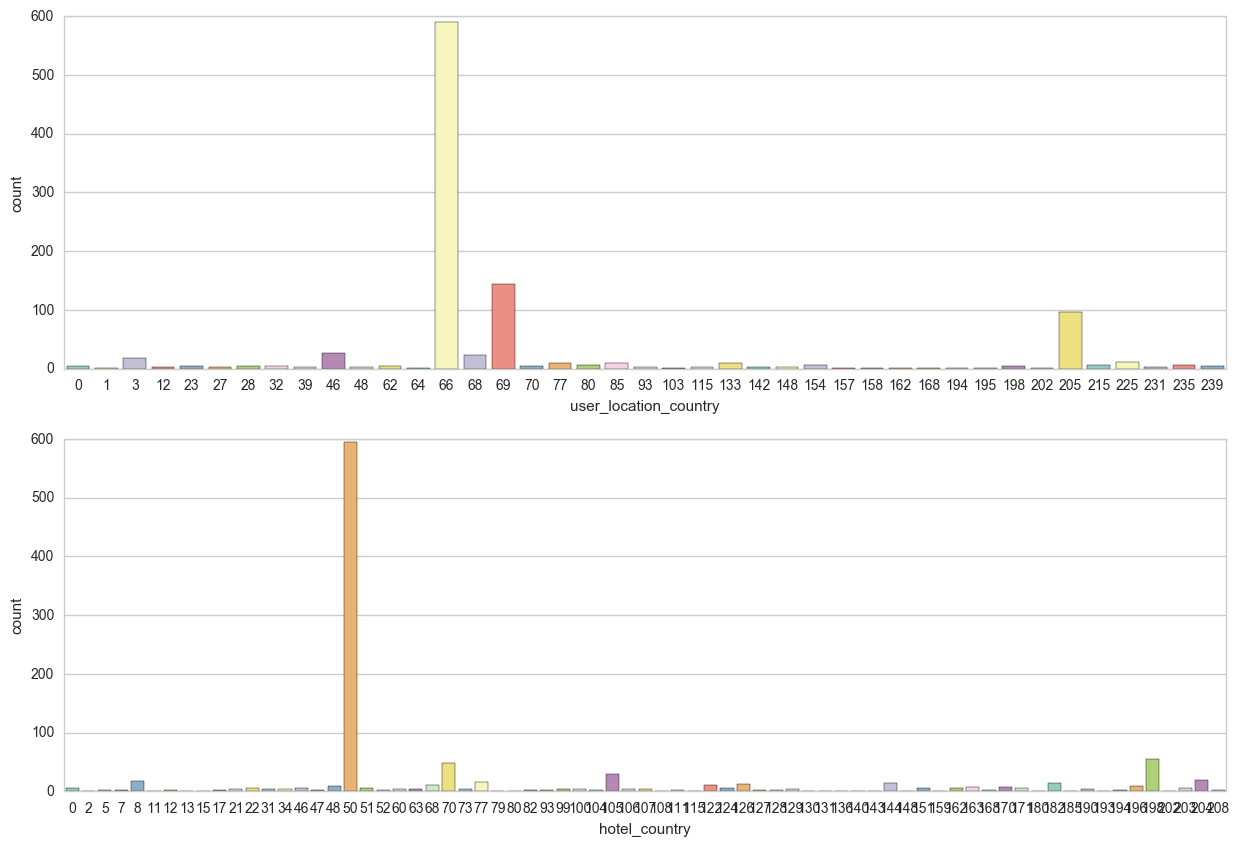

In [17]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = df[df["is_booking"] == 1]

# 여행을 많이 가는 사람들은 어느 나라일까
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# 여행지로 가장 많이 선택되는 나라는 어디일까
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

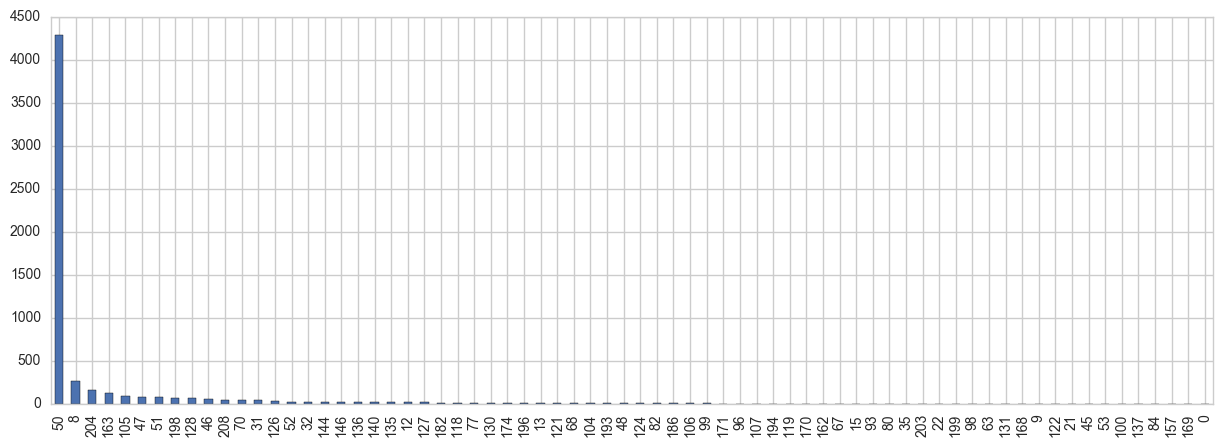

In [24]:
# user country id 66이 제일 많은 여행을 감..! 부자나라인가
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = df[df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',figsize=(15,5))

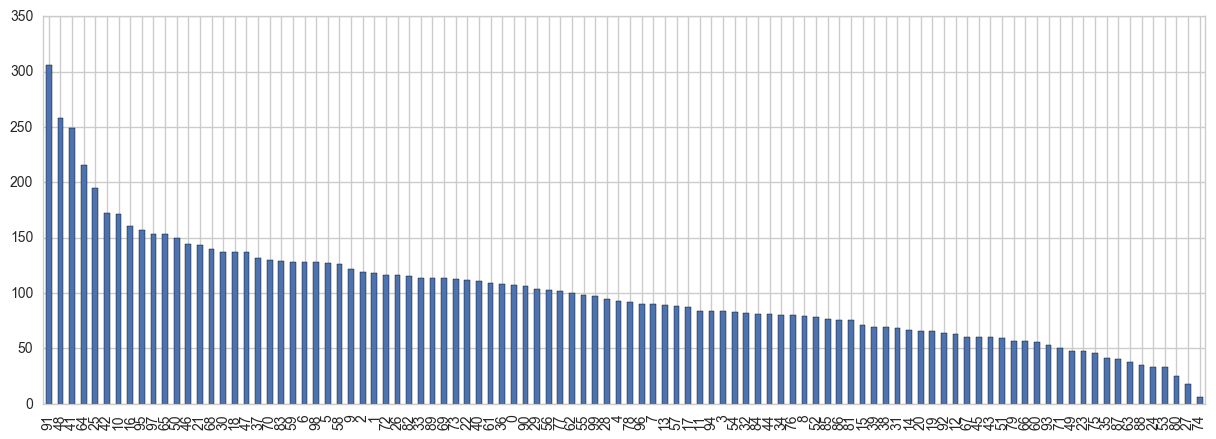

In [19]:
# hotel_cluster의 분류를 보장

df["hotel_cluster"].value_counts().plot(kind='bar',figsize=(15,5))

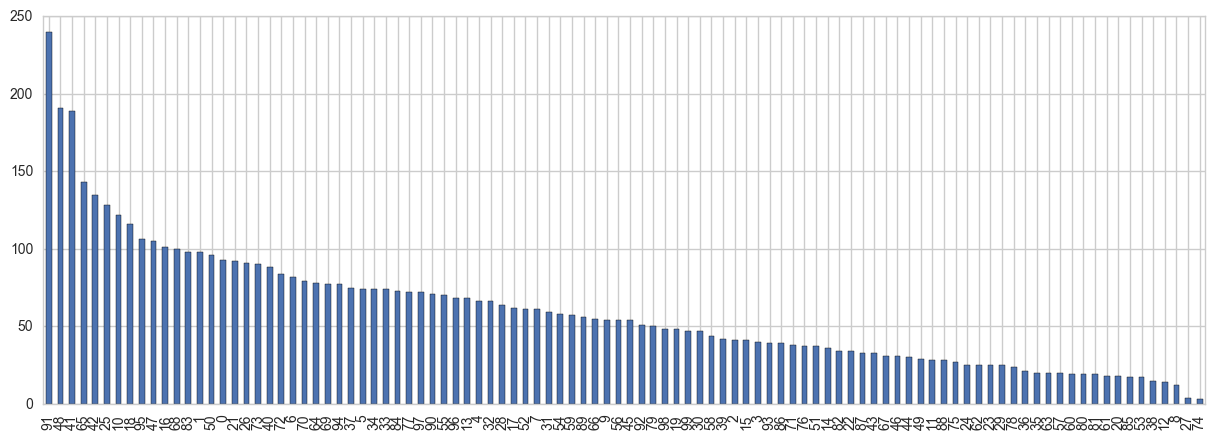

In [25]:
# 66번 나라에서 어떤 hotel을 예약하는가

user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

customer_clusters = df[df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',figsize=(15,5))

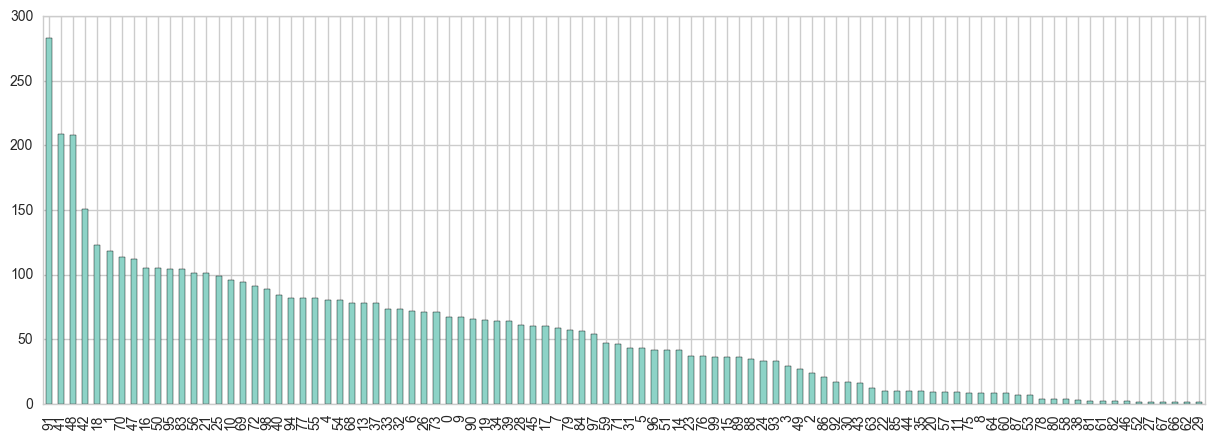

In [26]:
# 50나라에서 hotel cluster의 분류
country_id = 50

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_clusters = df[df["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

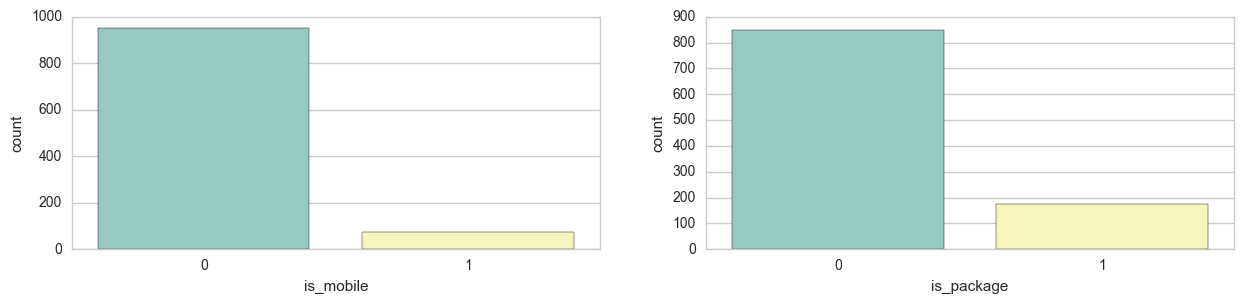

In [27]:
# mobile, package
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

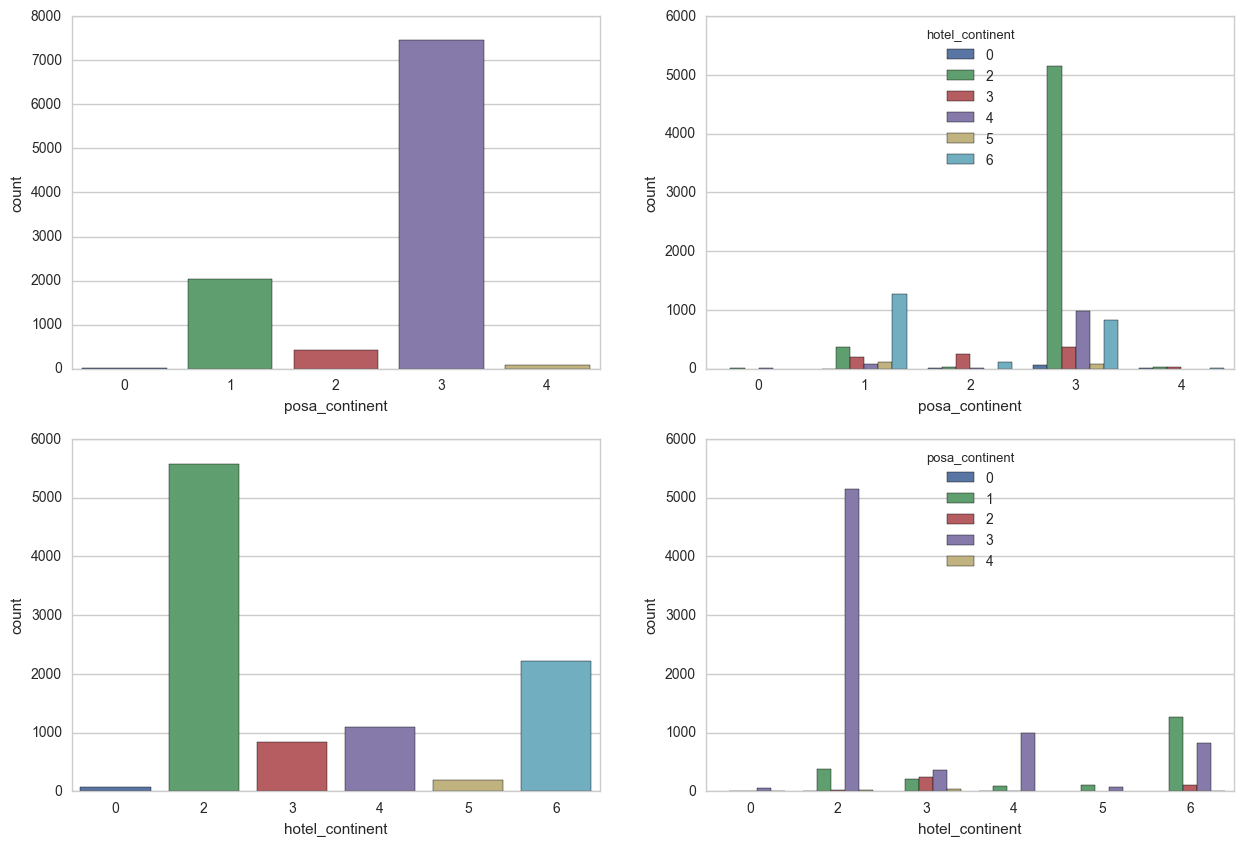

In [28]:
# post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data=df,order=[0,1,2,3,4] ,ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=df,order=[0,1,2,3,4] ,ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=df,order=[0,2,3,4,5,6] ,ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=df, order=[0,2,3,4,5,6] ,ax=axis4)

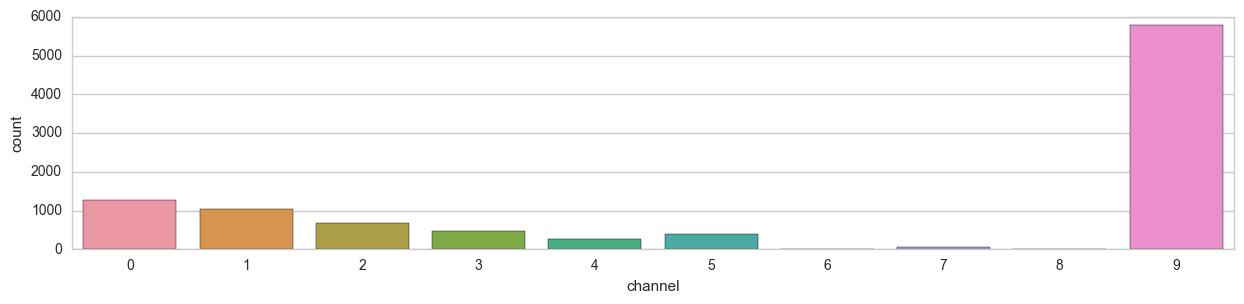

In [30]:
# 채널
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

sns.countplot(x='channel', order=list(range(0,10)), data=df)


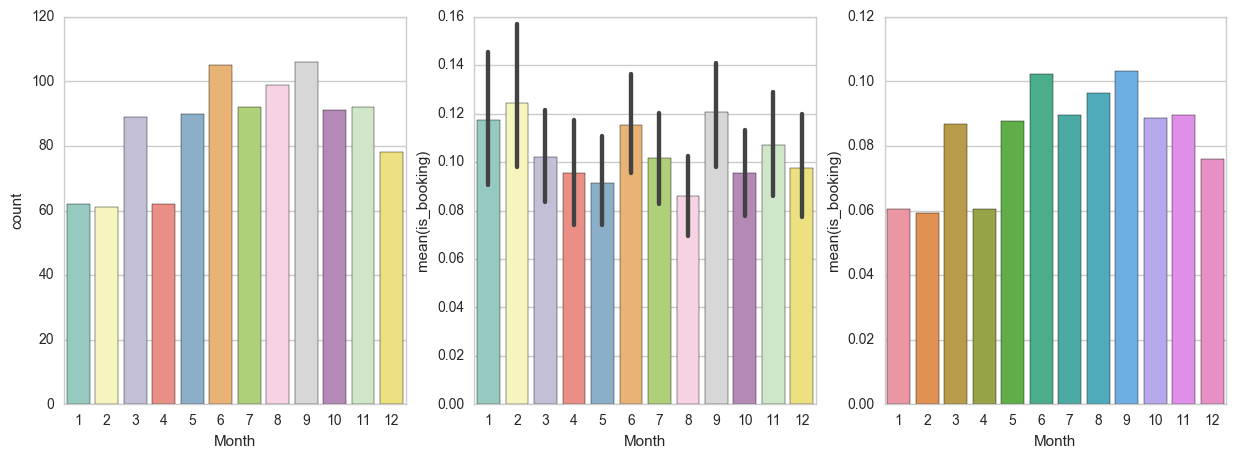

In [32]:

df['Year']   = df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
df['Month']  = df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
df['Week']   = df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharex=True,figsize=(15,5))

# 몇월이 제일 많은가
sns.countplot('Month',data=df[df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

# 해당 월의 booking 퍼세트
sns.barplot('Month',"is_booking",data=df, order=list(range(1,13)), palette="Set3",ax=axis2)

# 전체 월 대비 해당 월의 booking 퍼센트
month_sum = df[['Month', 'is_booking']].groupby(['Month'],as_index=False).sum()
month_sum['is_booking'] = month_sum['is_booking'] / len(df[df['is_booking'] == 1])

sns.barplot(x='Month', y='is_booking', order=list(range(1,13)), data=month_sum,ax=axis3) 

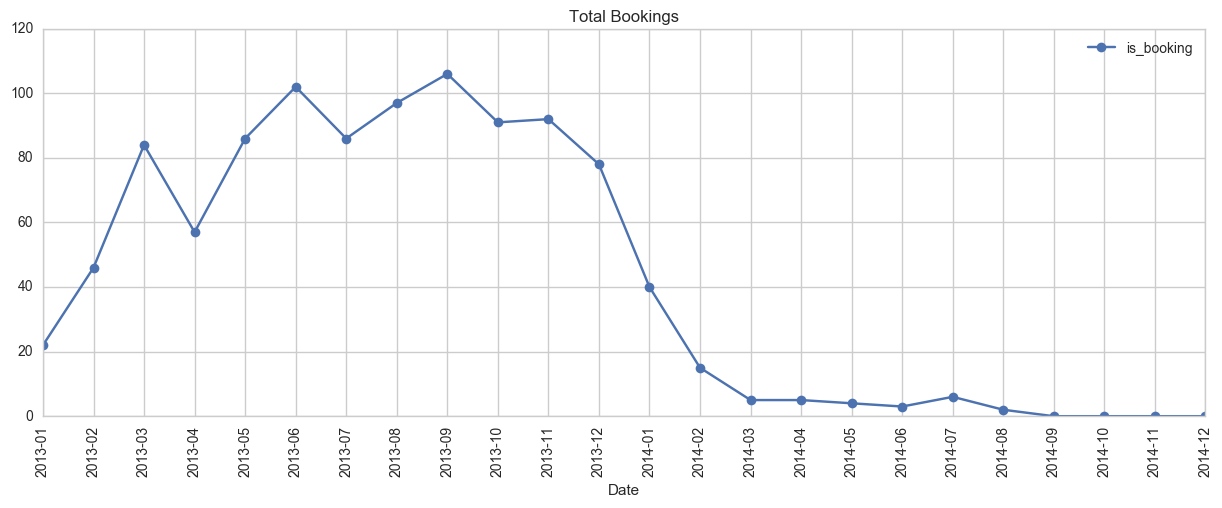

In [33]:
# check in 
# 2013년인데 14년도거를 미리 하는 경우가 있긴하지만 적음
df['Date']  = df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)


date_bookings  = df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

In [36]:
hotel_country_piv = pd.pivot_table(df,values='is_booking', index='Date', columns=['hotel_country'],aggfunc='sum')
hotel_country_piv = hotel_country_piv.fillna(0)
hotel_country_piv

hotel_country,0,2,5,7,8,9,10,11,12,13,15,17,21,22,26,27,31,32,34,35,39,45,46,47,48,...,157,159,162,163,168,169,170,171,174,179,180,182,185,186,190,193,194,196,198,199,200,202,203,204,208
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0
2013-05,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-06,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,3.0,5.0,1.0
2013-07,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,7.0,0.0
2013-08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
2013-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
